# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch import optim
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os
import math
from monai.losses import DiceLoss
from monai.utils.enums import MetricReduction
import os
import torch.utils.data as data
import torchvision.transforms.v2 as transforms
import torchvision.models as models
from monai.metrics import DiceMetric
from monai.data import Dataset, DataLoader, decollate_batch
import multiprocessing
from torch.nn.parallel import DistributedDataParallel as DDP
#import torch_xla.core.xla_model as xm
#from torch_xla.distributed.fsdp import XlaFullyShardedDataParallel as FSDP


In [ ]:
cores = multiprocessing.cpu_count()
print(cores)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
val_dir = '/home/pklogan/dev/CMSC472/Final_Project/ISBI2024-BraTS-GoAT-ValidationData'
train_dir = '/home/pklogan/dev/CMSC472/Final_Project/ISBI2024-BraTS-GoAT-TrainingData/ISBI2024-BraTS-GoAT-TrainingData'

val_sample = '/home/pklogan/dev/CMSC472/Final_Project/ISBI2024-BraTS-GoAT-ValidationData/BraTS-GoAT-02251/BraTS-GoAT-02251-t1c.nii.gz'

In [ ]:
brain_vol = nib.load(val_sample)
brain_vol_data = brain_vol.get_fdata()
print(brain_vol_data.shape)

# Data Visualization

In [ ]:
# Ground truth
plt.imshow(brain_vol_data[70], cmap='bone')
plt.axis('off')
plt.show()

In [ ]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
val_sample2 = val_dir + '/BraTS-GoAT-02251/BraTS-GoAT-02251-t1n.nii.gz'
brain_vol = nib.load(val_sample2)
brain_vol_data = brain_vol.get_fdata()
print(brain_vol_data.shape)
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
val_sample2 = val_dir + '/BraTS-GoAT-02251/BraTS-GoAT-02251-t2f.nii.gz'
brain_vol = nib.load(val_sample2)
brain_vol_data = brain_vol.get_fdata()
print(brain_vol_data.shape)
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
val_sample2 = val_dir + '/BraTS-GoAT-02251/BraTS-GoAT-02251-t2w.nii.gz'
brain_vol = nib.load(val_sample2)
brain_vol_data = brain_vol.get_fdata()
print(brain_vol_data.shape)
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
val_sample2 = '/home/pklogan/dev/CMSC472/Final_Project/ISBI2024-BraTS-GoAT-TrainingData/ISBI2024-BraTS-GoAT-TrainingData/BraTS-GoAT-00000/BraTS-GoAT-00000-t1c.nii.gz'
brain_vol = nib.load(val_sample2)
brain_vol_data = brain_vol.get_fdata()
print(brain_vol_data.shape)
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
val_sample2 = train_dir + '/BraTS-GoAT-00000/BraTS-GoAT-00000-seg.nii.gz'
brain_vol = nib.load(val_sample2)
brain_vol_data = brain_vol.get_fdata()
print(brain_vol_data.shape)
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

# Dataset and DataLoader Functions

@misc{brats23-tumor-segmentation,
    title={Multi-modal BraTS 2023 brain tumor segmentation},
    author={Muhammad Faizan},
    howpublished = {\url{https://github.com/faizan1234567/Brats-20-Tumors-segmentation}},
    year={2023}
}

In [ ]:
def load_image(file):
  brain_vol = nib.load(file)
  brain_vol_data = brain_vol.get_fdata()
  return brain_vol_data

In [ ]:
def get_singular_data(dir, folder, mode):
  data_types = ['-t2f.nii.gz', '-t1n.nii.gz', '-t1c.nii.gz', '-t2w.nii.gz']
  if mode == 'train':
    modalities = []
    for data_type in data_types:
      path = dir + '/' + folder + '/' + folder + data_type
      modalities.append(load_image(path))
    img = np.stack(modalities)
    img = np.moveaxis(img, (0, 1, 2, 3), (0, 3, 2, 1))
    mask = load_image(dir + '/' + folder + '/' + folder + '-seg.nii.gz')
    mask = np.moveaxis(mask, (0, 1, 2), (2, 1, 0))
    mask_WT = mask.copy()
    mask_WT[mask_WT == 1] = 1
    mask_WT[mask_WT == 2] = 1
    mask_WT[mask_WT == 3] = 1

    mask_TC = mask.copy()
    mask_TC[mask_TC == 1] = 1
    mask_TC[mask_TC == 2] = 0
    mask_TC[mask_TC == 3] = 1

    mask_ET = mask.copy()
    mask_ET[mask_ET == 1] = 0
    mask_ET[mask_ET == 2] = 0
    mask_ET[mask_ET == 3] = 1
    mask = np.stack([mask_WT, mask_TC, mask_ET])

  elif mode == 'val':
    modalities = []
    for data_type in data_types:
      path = dir + '/' + folder + '/' + folder + data_type
      modalities.append(load_image(path))
    img = np.stack(modalities)
    img = np.moveaxis(img, (0, 1, 2, 3), (0, 3, 2, 1))
    mask = (load_image(dir + '/' + folder + '/' + folder + '-seg.nii.gz'))
    mask = np.moveaxis(mask, (0, 1, 2), (2, 1, 0))
    mask_WT = mask.copy()
    mask_WT[mask_WT == 1] = 1
    mask_WT[mask_WT == 2] = 1
    mask_WT[mask_WT == 3] = 1

    mask_TC = mask.copy()
    mask_TC[mask_TC == 1] = 1
    mask_TC[mask_TC == 2] = 0
    mask_TC[mask_TC == 3] = 1

    mask_ET = mask.copy()
    mask_ET[mask_ET == 1] = 0
    mask_ET[mask_ET == 2] = 0
    mask_ET[mask_ET == 3] = 1
    mask = np.stack([mask_WT, mask_TC, mask_ET])
  else:
    modalities = []
    for data_type in data_types:
      path = folder + data_type
      modalities.append(load_image(path))
    img = np.stack(modalities)
    img = np.moveaxis(img, (0, 1, 2, 3), (0, 3, 2, 1))
  return img, mask

In [ ]:
# import pickle
# import random
# samples = os.listdir(train_dir)
# length = len(samples)
# train_length = 1672
# train_folders = random.sample(range(length), 1672)
# val_folders = []
# for i in range(length):
#     if i in train_folders:
#         continue
#     else:
#         val_folders.append(i)
# val_folders = random.sample(val_folders, 576)
# print(train_folders)
# print(len(train_folders))
# print(val_folders)
# print(len(val_folders))
# with open('train_folders.pkl', 'wb') as f:
#     pickle.dump(train_folders, f)
# with open('val_folders.pkl', 'wb') as file:
#     pickle.dump(val_folders, file)

In [ ]:
import pickle
def get_folders(dir, mode):
  samples = os.listdir(dir)
  with open('train_folders.pkl', 'rb') as f:
    train_folders = pickle.load(f)
  with open('val_folders.pkl', 'rb') as f:
    val_folders = pickle.load(f)
  folders = []
  if mode == 'train':
    for i in train_folders:
      folders.append(samples[i])
  elif mode == 'val':
    for i in val_folders:
      folders.append(samples[i])
  else:
    for folder in samples:
      folders.append(folder)
  return folders

In [ ]:
def get_data(dir, mode):
  data_types = ['-t2f.nii.gz', '-t1n.nii.gz', '-t1c.nii.gz', '-t2w.nii.gz']
  samples = os.listdir(dir)
  length = len(samples)
  print(length)
  train_length = math.floor(.7*length)
  print(train_length)
  imgs = []
  masks = []

  if mode == 'train':
      for i in range(train_length):
        modalities = []
        folder = samples[i]
        for data_type in data_types:
          path = dir + '/' + folder + '/' + folder + data_type
          modalities.append(load_image(path))
        img = np.stack(modalities)
        img = np.moveaxis(img, (0, 1, 2, 3), (0, 3, 2, 1))
        imgs.append(img)
        mask = load_image(dir + '/' + folder + '/' + folder + '-seg.nii.gz')
        mask = np.moveaxis(mask, (0, 1, 2), (2, 1, 0))
        mask_WT = mask.copy()
        mask_WT[mask_WT == 1] = 1
        mask_WT[mask_WT == 2] = 1
        mask_WT[mask_WT == 3] = 1

        mask_TC = mask.copy()
        mask_TC[mask_TC == 1] = 1
        mask_TC[mask_TC == 2] = 0
        mask_TC[mask_TC == 3] = 1

        mask_ET = mask.copy()
        mask_ET[mask_ET == 1] = 0
        mask_ET[mask_ET == 2] = 0
        mask_ET[mask_ET == 3] = 1
        mask = np.stack([mask_WT, mask_TC, mask_ET])
        masks.append(mask)

  elif mode == 'val':
    for i in range(train_length, math.floor(.3* length)):
      modalities = []
      folder = samples[i]
      for data_type in data_types:
        path = dir + '/' + folder + '/' + folder + data_type
        modalities.append(load_image(path))
      img = np.stack(modalities)
      img = np.moveaxis(img, (0, 1, 2, 3), (0, 3, 2, 1))
      imgs.append(img)
      mask = (load_image(dir + '/' + folder + '/' + folder + '-seg.nii.gz'))
      mask = np.moveaxis(mask, (0, 1, 2), (2, 1, 0))
      mask_WT = mask.copy()
      mask_WT[mask_WT == 1] = 1
      mask_WT[mask_WT == 2] = 1
      mask_WT[mask_WT == 3] = 1

      mask_TC = mask.copy()
      mask_TC[mask_TC == 1] = 1
      mask_TC[mask_TC == 2] = 0
      mask_TC[mask_TC == 3] = 1

      mask_ET = mask.copy()
      mask_ET[mask_ET == 1] = 0
      mask_ET[mask_ET == 2] = 0
      mask_ET[mask_ET == 3] = 1
      mask = np.stack([mask_WT, mask_TC, mask_ET])
      masks.append(mask)

  else:
    for folder in samples:
      modalities = []
      for data_type in data_types:
        path = folder + data_type
        modalities.append(load_image(path))
      img = np.stack(modalities)
      img = np.moveaxis(img, (0, 1, 2, 3), (0, 3, 2, 1))
      imgs.append(img)
  return imgs, masks

In [ ]:
def normalize(x):
  return (x - torch.mean(x))/torch.std(x)

In [ ]:
def normalize(x):
    return (x - torch.min(x)) / (torch.max(x) - torch.min(x))

In [ ]:
class BraTsDataset(Dataset):
  def __init__(self, folder, img_transform, mask_transform, augment_transform = None, mode='train'):
    self.img_transform = img_transform
    self.mask_transform = mask_transform
    self.augment_transform = augment_transform
    self.imgs, self.masks = get_data(folder, mode)
    self.mode = mode
  def __len__(self):
    return len(self.imgs)
  def __getitem__(self, index):
    if self.mode != 'test':
      img, mask = self.imgs[index], self.masks[index]
      img, mask = torch.from_numpy(img), torch.from_numpy(mask)
      if self.img_transform != None and self.mask_transform != None:
        img, mask = self.img_transform(img), self.mask_transform(mask)
      if self.augment_transform != None:
        img = self.augment_transform(img)
      img = normalize(img)
      return img, mask
    else:
      img = self.imgs[index]
      img = normalize(img)
      if self.img_transform != None:
        return self.img_transform(img)
      else:
        return img

In [ ]:
class BraTsDataset(Dataset):
  def __init__(self, folder, img_transform, mask_transform, augment_transform = None, mode='train', pre_trained = False):
    self.img_transform = img_transform
    self.mask_transform = mask_transform
    self.augment_transform = augment_transform
    self.folders = get_folders(folder, mode)
    self.dir = folder
    self.mode = mode
    self.pre_trained = pre_trained
  def __len__(self):
    return len(self.folders)
  def __getitem__(self, index):
    if self.mode != 'test':
      img, mask = get_singular_data(self.dir, self.folders[index], self.mode)
      img, mask = torch.from_numpy(img), torch.from_numpy(mask)
      if self.pre_trained:
        img, mask = torch.cat([img, torch.zeros(4, 5, 240, 240)], dim = 1), torch.cat([mask, torch.zeros(3, 5, 240, 240)], dim = 1)
      if self.img_transform != None and self.mask_transform != None:
        img, mask = self.img_transform(img), self.mask_transform(mask)
      if self.augment_transform != None:
        img, mask = self.augment_transform(img), self.augment_transform(mask)
      img = normalize(img)
      return img, mask
    else:
      img = get_singular_data(self.dir, self.folders[index])
      img = normalize(img)
      if self.img_transform != None:
        return self.img_transform(img)

In [ ]:
class BraTsDataset(Dataset):
  def __init__(self, folder, img_transform, mask_transform, augment_transform = None, mode='train', pre_trained = False):
    self.img_transform = img_transform
    self.mask_transform = mask_transform
    self.augment_transform = augment_transform
    self.folders = get_folders(folder, mode)
    self.dir = folder
    self.mode = mode
    self.pre_trained = pre_trained
  def __len__(self):
    return len(self.folders)
  def __getitem__(self, index):
    if self.mode != 'test':
      img, mask = get_singular_data(self.dir, self.folders[index], self.mode)
      img, mask = torch.from_numpy(img), torch.from_numpy(mask)
      if self.pre_trained:
        img, mask = torch.cat([img, torch.zeros(4, 5, 240, 240)], dim = 1), torch.cat([mask, torch.zeros(3, 5, 240, 240)], dim = 1)
      if self.img_transform != None and self.mask_transform != None:
        img, mask = self.img_transform(img), self.mask_transform(mask)
      img = normalize(img)
      if self.augment_transform != None:
        data = {'image': img, 'label': mask}
        aug = self.augment_transform(data)
        img, mask = aug['image'], aug['label']
      return img, mask
    else:
      img = get_singular_data(self.dir, self.folders[index])
      img = normalize(img)
      if self.img_transform != None:
        return self.img_transform(img)

# Model Design
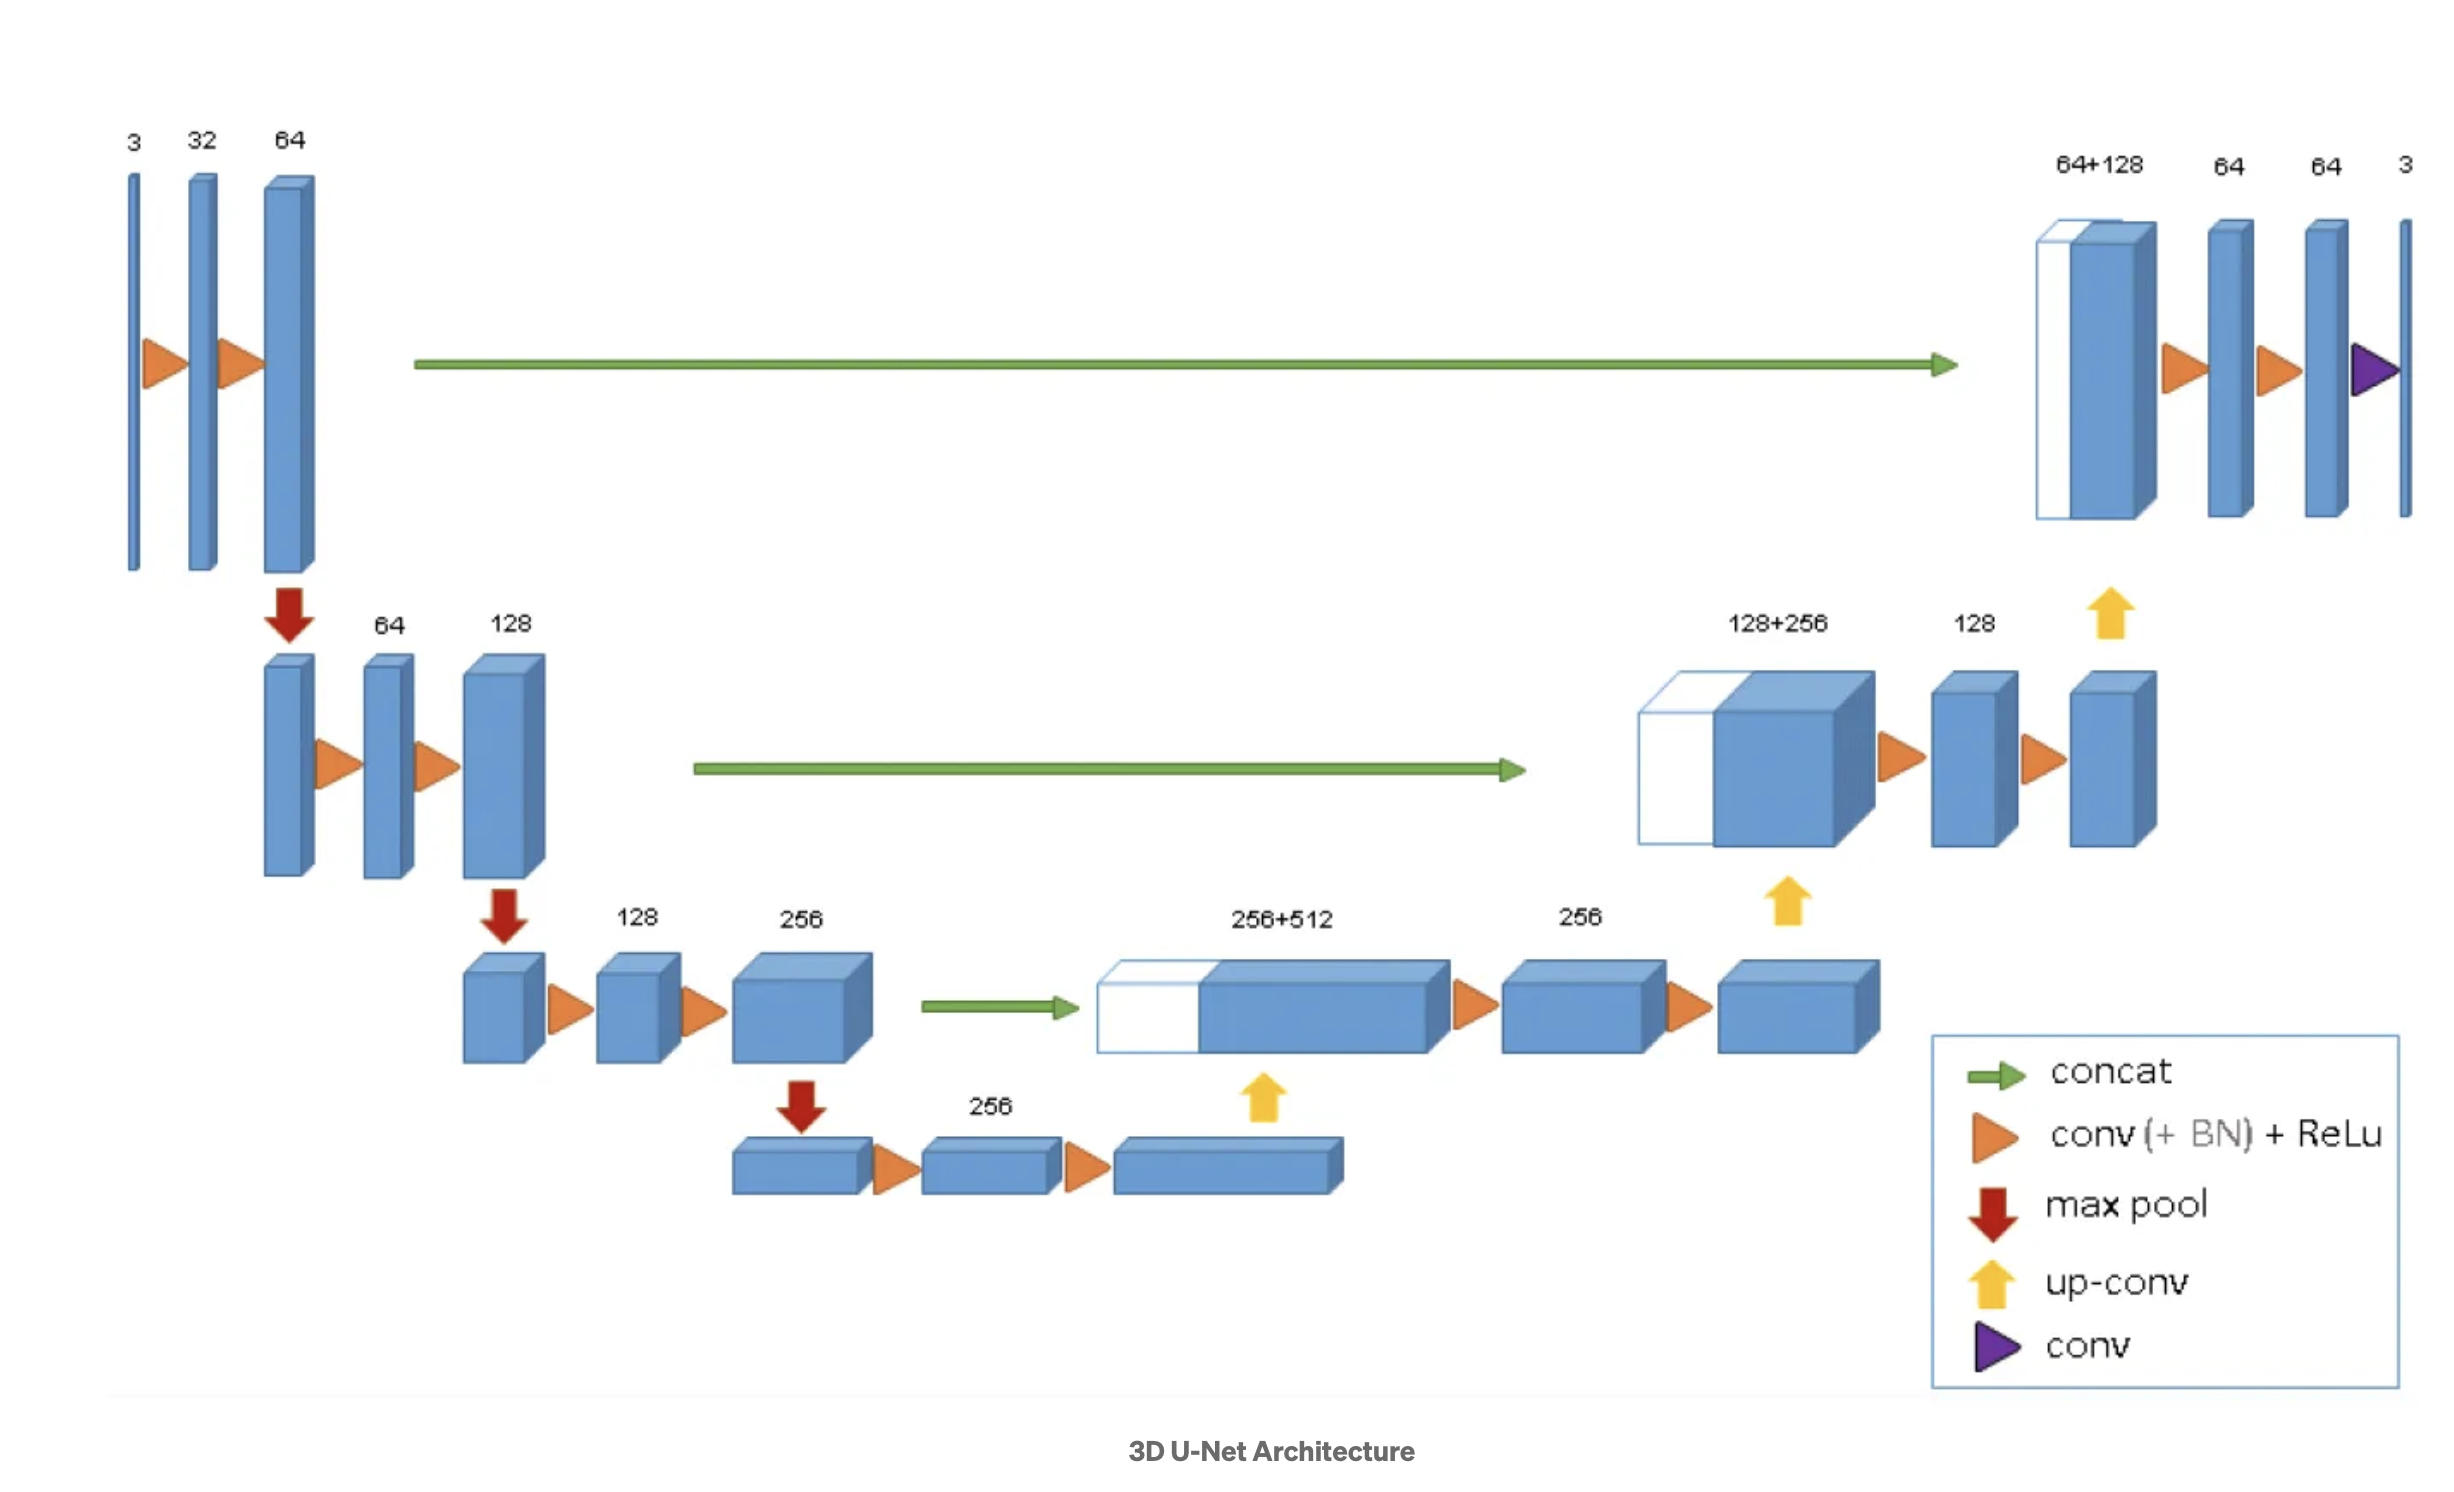

https://medium.com/miccai-educational-initiative/nnu-net-the-no-new-unet-for-automatic-segmentation-8d655f3f6d2a

https://towardsdatascience.com/review-3d-u-net-volumetric-segmentation-medical-image-segmentation-8b592560fac1


## Building Blocks of Model

In [ ]:
# class DoubleConv(nn.Module):
#   def __init__(self, in_channels, out_channels, stride, padding = 0, mid_channels = None, kernel_size = 3):
#     super(DoubleConv, self).__init__()
#     if mid_channels == None:
#       mid = out_channels
#     else:
#       mid = mid_channels
#     self.double_conv = nn.Sequential(
#         nn.Conv3d(in_channels = in_channels, out_channels = mid, kernel_size = kernel_size, stride = stride, padding = padding),
#         nn.BatchNorm3d(mid),
#         nn.ReLU(inplace = True),
#         nn.Conv3d(in_channels = mid, out_channels = out_channels, kernel_size = kernel_size, stride = stride, padding = padding),
#         nn.BatchNorm3d(out_channels),
#         nn.ReLU(inplace = True)
#     )

#   def forward(self, x):
#     return self.double_conv(x)

In [ ]:
# class DownScale(nn.Module):
#   def __init__(self, in_channels, out_channels, stride, padding = 0, mid_channels = None, kernel_size = 3, pool_kernel = 2):
#     super(DownScale, self).__init__()
#     if mid_channels == None:
#       mid = out_channels
#     else:
#       mid = mid_channels
#     self.max_pool = nn.MaxPool3d(pool_kernel)
#     self.double_conv = DoubleConv(in_channels, out_channels, stride, padding, mid_channels, kernel_size = 3)

#   def forward(self, x):
#     x = self.max_pool(x)
#     return self.double_conv(x)

In [ ]:
# class UpScale(nn.Module):
#   def __init__(self, in_channels, out_channels, stride, padding = 0, mid_channels = None, kernel_size = 3, transpose_kernel = 2):
#     super(UpScale, self).__init__()
#     self.up_conv = nn.ConvTranspose3d(in_channels, in_channels, kernel_size = transpose_kernel, stride = 2)
#     self.dropout = nn.Dropout3d(.2)
#     self.double_conv = DoubleConv(in_channels*2, out_channels, stride, padding, mid_channels, kernel_size)

#   def forward(self, input, concat_input):
#     input = self.up_conv(input)
#     #input = self.batch_norm(input)
#     x = torch.cat([concat_input, input], dim = 1)
#     x = self.dropout(x)
#     return self.double_conv(x)

In [ ]:
# '''
# When upsampling, we sometimes run into issues with dimensions being odd. This is a workaround to resize images with
# the hope of not changing the data too much.
# '''
# class ConditionalResize(nn.Module):
#     def __init__(self, target_size):
#         super(ConditionalResize, self).__init__()
#         self.target_size = target_size

#     def forward(self, x):
#         if x.size(2) != self.target_size[0] or x.size(3) != self.target_size[1] or x.size(4) != self.target_size[2]:
#             x = F.interpolate(x, size=self.target_size, mode='trilinear', align_corners=True)
#         return x

In [ ]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, stride, padding, mid_channels, kernel_size=3):
        super(DoubleConv, self).__init__()
        self.conv1 = nn.Conv3d(in_channels, mid_channels, kernel_size, stride, padding)
        self.conv2 = nn.Conv3d(mid_channels, out_channels, kernel_size, stride, padding)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x

class DownScale(nn.Module):
    def __init__(self, in_channels, out_channels, stride, padding=1, mid_channels=None, kernel_size=3, pool_kernel=2):
        super(DownScale, self).__init__()
        mid = mid_channels if mid_channels is not None else out_channels
        self.max_pool = nn.MaxPool3d(pool_kernel, pool_kernel)
        self.double_conv = DoubleConv(in_channels, out_channels, stride, padding, mid, kernel_size)

    def forward(self, x):
        x = self.max_pool(x)
        x = self.double_conv(x)
        return x

class ConditionalResize(nn.Module):
    def __init__(self, target_size):
        super(ConditionalResize, self).__init__()
        self.target_size = target_size

    def forward(self, x):
        current_size = x.size()[2:]
        if current_size != self.target_size:
            x = F.interpolate(x, size=self.target_size, mode='trilinear', align_corners=True)
        return x

class UpScale(nn.Module):
    def __init__(self, in_channels, concat_channels, out_channels, stride, padding, kernel_size, transpose_kernel, output_padding):
        super(UpScale, self).__init__()
        self.up_conv = nn.ConvTranspose3d(in_channels, in_channels, kernel_size=transpose_kernel, stride=2, padding=0, output_padding=output_padding)
        self.double_conv = DoubleConv(in_channels + concat_channels, out_channels, stride, padding, out_channels, kernel_size)

    def forward(self, input, concat_input):
        input = self.up_conv(input)
        if input.size() != concat_input.size():
            input = F.interpolate(input, size=concat_input.size()[2:], mode='trilinear', align_corners=False)
        x = torch.cat((concat_input, input), dim=1)
        return self.double_conv(x)


## Model

In [ ]:
# channels = [8, 16, 32, 32]
# first_mid = 4
# class Unet3D(nn.Module):
#   def __init__(self, in_channels, out_channels):
#     super(Unet3D, self).__init__()
#     self.double_conv = DoubleConv(in_channels = in_channels, out_channels = channels[0], stride = 1, padding = 1, mid_channels = first_mid, kernel_size = (3,3,3))
#     self.down1 = DownScale(in_channels = channels[0], out_channels = channels[1], stride = 1, padding = 1, mid_channels = channels[0], kernel_size = (3,3,3))
#     self.down2 = DownScale(in_channels = channels[1], out_channels = channels[2], stride = 1, padding = 1, mid_channels = channels[1], kernel_size = (3,3,3))
#     self.down3 = DownScale(in_channels = channels[2], out_channels = channels[3], stride = 1, padding = 1, mid_channels = channels[2], kernel_size = (3,3,3))
#     self.up1 = UpScale(in_channels = channels[3], out_channels = channels[2], stride = 1, padding = 0, mid_channels = channels[2], kernel_size = (3,3,3), transpose_kernel = (2,2,2))
#     self.up2 = UpScale(in_channels = channels[2], out_channels = channels[1], stride = 1, padding = 0, mid_channels = channels[1], kernel_size = (3,3,3), transpose_kernel = (2,2,2))
#     self.up3 = UpScale(in_channels = channels[1], out_channels = channels[0], stride = 1, padding = 0, mid_channels = channels[0], kernel_size = (3,3,3), transpose_kernel = (2,2,2))
#     self.final_conv = nn.Conv3d(in_channels = channels[0], out_channels = out_channels, kernel_size = (1,1,1))

#   def forward(self, x):
#     print('before conv')
#     print(x.size())
#     x1 = self.double_conv(x)
#     print(x1.size())
#     print('before down1')
#     x2 = self.down1(x1)
#     print(x2.size())
#     print('before down2')
#     x3 = self.down2(x2)
#     print(x3.size())
#     print('before down3')
#     x4 = self.down3(x3)
#     print(x4.size())
#     print('before up1')
#     x = self.up1(x4, x3)
#     print(x.size())
#     print('before up2')
#     x = self.up2(x, x2)
#     print(x.size())
#     print('before up3')
#     x = self.up3(x, x1)
#     print(x.size())
#     print('before final conv')
#     x = self.final_conv(x)
#     return x

In [ ]:
class Unet3D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Unet3D, self).__init__()
        channels = [4, 8, 16, 32]
        first_mid = 4
        self.double_conv = DoubleConv(in_channels=in_channels, out_channels=channels[0], stride=1, padding=1, mid_channels=first_mid, kernel_size=(3,3,3))
        self.down1 = DownScale(in_channels=channels[0], out_channels=channels[1], stride=1, padding=1, mid_channels=channels[0], kernel_size=(3,3,3))
        self.down2 = DownScale(in_channels=channels[1], out_channels=channels[2], stride=1, padding=1, mid_channels=channels[1], kernel_size=(3,3,3))
        #self.down3 = DownScale(in_channels=channels[2], out_channels=channels[3], stride=1, padding=1, mid_channels=channels[2], kernel_size=(3,3,3))
        # self.up1 = UpScale(in_channels=channels[3], out_channels=channels[2], target_size=(38, 60, 60), stride=1, padding=1, mid_channels=channels[2], kernel_size=(3,3,3), transpose_kernel=(2,2,2))
        # self.up2 = UpScale(in_channels=channels[2], out_channels=channels[1], target_size=(77, 120, 120), stride=1, padding=1, mid_channels=channels[1], kernel_size=(3,3,3), transpose_kernel=(2,2,2))
        # self.up3 = UpScale(in_channels=channels[1], out_channels=channels[0], target_size=(155, 240, 240), stride=1, padding=1, mid_channels=channels[0], kernel_size=(3,3,3), transpose_kernel=(2,2,2))
        #self.up1 = UpScale(in_channels=channels[3], concat_channels=channels[2], out_channels=channels[2], stride=1, padding=1, kernel_size=(3,3,3), transpose_kernel=(2,2,2), output_padding=(1, 0, 0))
        self.up2 = UpScale(in_channels=channels[2], concat_channels=channels[1], out_channels=channels[1], stride=1, padding=1, kernel_size=(3,3,3), transpose_kernel=(2,2,2), output_padding=(1, 0, 0))
        self.up3 = UpScale(in_channels=channels[1], concat_channels=channels[0], out_channels=channels[0], stride=1, padding=1, kernel_size=(3,3,3), transpose_kernel=(2,2,2), output_padding=(0, 0, 0))
        self.final_conv = nn.Conv3d(in_channels=channels[0], out_channels=out_channels, kernel_size=(1,1,1))

    def forward(self, x):
        #print('Initial input size:', x.size())
        x1 = self.double_conv(x)
        #print('After double_conv:', x1.size())

        x2 = self.down1(x1)
        #print('After down1:', x2.size())

        x3 = self.down2(x2)
        #print('After down2:', x3.size())

        #x4 = self.down3(x3)
        #print('After down3:', x4.size())

        #x = self.up1(x4, x3)
        #print('After up1:', x.size())

        x = self.up2(x3, x2)
        #print('After up2:', x.size())

        x = self.up3(x, x1)
        #print('After up3:', x.size())

        x = self.final_conv(x)
        #print('Final output size:', x.size())
        return x

In [ ]:
class TransSegResNet(nn.Module):
  def __init__(self, pre_trained_model, dim, nhead, dim_feedforward, depth):
    super(TransSegResNet, self).__init__()
    self.dim = dim
    self.pre_trained = pre_trained_model
    self.positional_encoder = nn.Parameter(torch.randn((20*30*30, dim)))
    self.conv_x = nn.Conv3d(in_channels = 128, out_channels = dim, kernel_size = (3,3,3), stride = 1, padding = 1)
    self.conv2 = nn.Conv3d(in_channels = dim, out_channels = 128, kernel_size = (3,3,3), stride = 1, padding = 1)
    self.encoder_layers = []
    self.depth = depth
    for i in range(depth):
      self.encoder_layers.append(nn.TransformerEncoderLayer(d_model = dim, nhead = nhead, dim_feedforward = dim_feedforward))
    #self.decoder = nn.TransformerDecoderLayer(d_model = dim, nhead = nhead, dim_feedforward = dim_feedforward)
    self.encoder_layers = nn.ModuleList(self.encoder_layers)
  def forward(self, x):
    x, down_x = self.pre_trained.encode(x)
    #x shape = ([2, 128, 20, 30, 30])
    down_x.reverse()
    x = self.conv_x(x)
    x = x.permute(0, 2, 3, 4, 1)
    x = x.view(x.size(0), -1, self.dim)
    x = x + self.positional_encoder
    for encoder in self.encoder_layers:
      x = encoder(x)
    x = x.view(x.size(0), 512, 20, 30, 30)
    x = self.conv2(x)
    x = self.pre_trained.decode(x, down_x)
    return x
    #Output shape = ([2, 3, 160, 240, 240])





https://arxiv.org/abs/1804.03999
Based off of the Attention Unet

In [ ]:
class AttentionBlock(nn.Module):
  def __init__(self, f_int, f_g, f_l):
    super(AttentionBlock, self).__init__()
    self.W_g = nn.Sequential(
        nn.Conv3d(f_g, f_int, kernel_size = 1, stride = 1, padding = 0),
        nn.Dropout3d(.2),
        nn.BatchNorm3d(f_int)
    )

    self.W_x = nn.Sequential(
        nn.Conv3d(f_l, f_int, kernel_size = 1, stride = 1, padding = 0),
        nn.Dropout3d(.2),
        nn.BatchNorm3d(f_int)
    )

    self.psi = nn.Sequential(
        nn.Conv3d(f_int, 1, kernel_size = 1, stride = 1, padding = 0),
        nn.Dropout3d(.2),
        nn.BatchNorm3d(1),
        nn.Sigmoid()
    )
    self.relu = nn.ReLU(inplace = True)

  def forward(self, g, x):
    g = self.W_g(g)
    x = self.W_x(x)
    psi = self.relu(g + x)
    psi = self.psi(psi)
    return x*psi




In [ ]:
from __future__ import annotations

from collections.abc import Sequence

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from monai.networks.blocks.segresnet_block import ResBlock, get_conv_layer, get_upsample_layer
from monai.networks.layers.factories import Dropout
from monai.networks.layers.utils import get_act_layer, get_norm_layer
from monai.utils.enums import UpsampleMode
import monai.transforms as transform

In [ ]:
class AttentionSegResNet(nn.Module):
  def __init__(self, pre_trained_model,upsample_mode: UpsampleMode | str = UpsampleMode.NONTRAINABLE ):
    super(AttentionSegResNet, self).__init__()
    self.pre_trained = pre_trained_model
    self.upsample_mode = UpsampleMode(upsample_mode)
    self.up_layers, self.up_samples = self._make_up_layers()
    self.up_layers.load_state_dict(self.pre_trained.up_layers.state_dict())
    self.up_samples.load_state_dict(self.pre_trained.up_samples.state_dict())
    self.att_layers = nn.ModuleList()
    self.att_layers.append(AttentionBlock(f_int = 64, f_g = 64, f_l = 64))
    self.att_layers.append(AttentionBlock(f_int = 32, f_g = 32, f_l = 32))
    self.att_layers.append(AttentionBlock(f_int = 16, f_g = 16, f_l = 16))
  def _make_up_layers(self):
    up_layers, up_samples = nn.ModuleList(), nn.ModuleList()
    upsample_mode, blocks_up, spatial_dims, filters, norm = (
        self.upsample_mode,
        self.pre_trained.blocks_up,
        self.pre_trained.spatial_dims,
        self.pre_trained.init_filters,
        self.pre_trained.norm,
    )
    n_up = len(blocks_up)
    for i in range(n_up):
        sample_in_channels = filters * 2 ** (n_up - i)
        up_layers.append(
            nn.Sequential(
                *[
                    ResBlock(spatial_dims, sample_in_channels // 2, norm=norm, act=self.pre_trained.act)
                    for _ in range(blocks_up[i])
                ]
            )
        )
        up_samples.append(
            nn.Sequential(
                *[
                    get_conv_layer(spatial_dims, sample_in_channels, sample_in_channels // 2, kernel_size=1),
                    get_upsample_layer(spatial_dims, sample_in_channels // 2, upsample_mode=upsample_mode),
                ]
            )
        )
    return up_layers, up_samples

  def decode(self, x: torch.Tensor, down_x: list[torch.Tensor]) -> torch.Tensor:
    for i, (up, upl, att) in enumerate(zip(self.up_samples, self.up_layers, self.att_layers)):
        #d5 = self.Up5(x5)
        #x4 = self.Att5(g=d5,x=x4)
        #d5 = torch.cat((x4,d5),dim=1)
        #d5 = self.Up_conv5(d5)
        x1 = up(x)
        x = att(x1, down_x[i+1])
        #x = torch.cat((x,x1),dim=1)
        x = upl(x)


    if self.pre_trained.use_conv_final:
        x = self.pre_trained.conv_final(x)

    return x
  def forward(self, x):
    x, down_x = self.pre_trained.encode(x)
    #x shape = ([2, 128, 20, 30, 30])
    down_x.reverse()
    x = self.decode(x, down_x)
    return x
    #Output shape = ([2, 3, 160, 240, 240])

In [ ]:
pre_trained = torch.jit.load('/home/pklogan/dev/CMSC472/Final_Project/brats_mri_segmentation/models/model.ts')
pre_trained.load_state_dict(torch.load('/home/pklogan/dev/CMSC472/Final_Project/brats_mri_segmentation/models/model.pt'))
pre_trained.to(device)
model = AttentionSegResNet(pre_trained_model = pre_trained)

In [ ]:
#model = TransSegResNet(pre_trained_model = pre_trained, dim = 512, nhead = 8, dim_feedforward = 512, depth = 3)
model.to(device)

# Define Dataset and DataLoaders

## Transforms

In [ ]:
img_transform = transform.Compose(
    [#transforms.ToImage(),
     transforms.ToDtype(torch.float32, scale=True),
     #transforms.Resize((256,256)),

     #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
mask_transform = transforms.Compose([
                                     #transforms.Resize((256,256)),
                                     #transforms.ToImage(),
                                     transforms.ToDtype(torch.float32, scale=True)
                                     ])
augment_transform_train = transform.Compose(
        [   transform.EnsureTyped(keys=["image", "label"]),
            transform.RandFlipd(keys=["image", "label"], prob=0.5, spatial_axis=0),
            transform.RandFlipd(keys=["image", "label"], prob=0.5, spatial_axis=1),
            transform.RandFlipd(keys=["image", "label"], prob=0.5, spatial_axis=2),
            transform.NormalizeIntensityd(keys="image", nonzero=True, channel_wise=True),
            transform.RandScaleIntensityd(keys="image", factors=0.1, prob=1.0),
            transform.RandShiftIntensityd(keys="image", offsets=0.1, prob=1.0),
        ])

augment_transform_val = transform.Compose(
            [
                transform.EnsureTyped(keys=["image", "label"]),
                transform.NormalizeIntensityd(keys="image", nonzero=True, channel_wise=True),
                
            ])


In [ ]:
train_set = BraTsDataset(folder = train_dir, img_transform = img_transform, mask_transform = mask_transform, augment_transform = augment_transform_train, mode = 'train', pre_trained = True)
val_set = BraTsDataset(folder = train_dir, img_transform = img_transform, mask_transform = mask_transform, augment_transform= augment_transform_val, mode = 'val', pre_trained = True)
print(len(train_set))
#test_set = BraTsDataset(folder = val_dir, img_transform = img_transform, mask_transform = None, mode = 'test')

# Define Hyperparemeters

In [ ]:
num_classes = 3
#model = Unet3D(in_channels = 4, out_channels = num_classes)
#model = TransSegResNet(pre_trained_model = pre_trained, dim = 512, nhead = 8, dim_feedforward = 512, depth = 3)
#model = DDP(model)
loss_func = DiceLoss(to_onehot_y=False, sigmoid=True)
criterion = DiceMetric(include_background=True, reduction=MetricReduction.MEAN_BATCH,
                                      get_not_nans=True)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay= 1e-5)
batch_size = 1
scheduler = Q = math.floor(len(train_set)/batch_size)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, Q)
num_epochs = 5
train_loss_batch = []
val_loss_batch = []
train_dice_batch = []
val_dice_batch = []
train_loss_epoch = []
val_loss_epoch = []
train_acc_epoch = []
val_acc_epoch = []
best_val_acc = 0.0
corr_val_loss = 0.0

In [ ]:
train_dataloader = DataLoader(train_set, batch_size= batch_size, shuffle=True, num_workers= 2)
val_dataloader = DataLoader(val_set, batch_size= batch_size, shuffle=True, num_workers= 2)

@misc{brats23-tumor-segmentation, title={Multi-modal BraTS 2023 brain tumor segmentation}, author={Muhammad Faizan}, howpublished = {\url{https://github.com/faizan1234567/Brats-20-Tumors-segmentation}}, year={2023} }

In [ ]:
def dice_score(probabilites: torch.Tensor, labels: torch.Tensor, threshold: float = 0.5, eps: float = 1e-9)->np.ndarray:
    scores = []
    num = probabilites.shape[0]
    predictions = (probabilites >= threshold).float()
    assert predictions.shape == labels.shape
    for i in range(num):
        prediction = predictions[i]
        label = labels[i]
        intersection = 2.0 * (label * prediction).sum()
        union = label.sum() + prediction.sum()
        if label.sum() == 0 and prediction.sum() == 0:
            scores.append(1.0)
        else:
            scores.append((intersection + eps)/union)
    return np.mean(scores)

# Training and Val Loops

In [ ]:
# Run your training / validation loops
import pickle
for epoch in range(len(val_loss_epoch), num_epochs):
    #Training phase
    model.train()  #Setting the model to train phase
    train_loss = []
    val_loss = []
    val_dice = []
    train_dice = []
    train_correct = 0
    total_train = 0
    train_acc = 0.
    val_correct = 0
    total_val = 0
    val_acc = 0.

    for idx, batch in enumerate(train_dataloader):
        ## TODO: fetch inputs and labels from batch
        inputs, labels = batch
        # labels = labels.float()
        #print(f"size of labels: {labels.size()}")
        #print(f"size of inputs: {inputs.size()}")
        #labels = labels.long()

        optimizer.zero_grad()
        inputs = inputs.to(device)
        labels = labels.to(device)
        ## TODO: pass inputs to model
        preds = model(inputs)
        #print(f"size of preds: {preds.size()}")
        #print(f"preds.requires_grad: {preds.requires_grad}")
        ## TODO: call loss function
        # Assuming 'tensor' is your original tensor with shape [2, 4, 155, 240, 240]
        #print(f"Type of preds: {type(preds)}")
        #print(f"Type of labels: {type(labels)}")
        loss = loss_func(preds, labels)
        ## TODO: call backward
        #print(f"loss: {(loss)}")
        loss.backward()
        ## TODO: step optimizer
        optimizer.step()
        ## TODO: compute accuracy and track accuracy and loss
        train_loss.append(loss.item())
        train_loss_batch.append(loss.item())
        dice = dice_score(preds.cpu(), labels.cpu())
        train_dice_batch.append(dice)
        train_dice.append(dice)
        ## IMPORTANT: don't forget to call zero_grad on the optimizer between batches!!!
        if idx % 50 == 0:
            print("Batch : {}, Train loss: {}".format(idx, np.mean(train_loss)))
    train_acc = np.mean(train_dice)
    train_acc_epoch.append(train_acc)
    train_loss_epoch.append(np.mean(train_loss))
    #Validation phase
    model.eval()  #Setting the model to eval mode, hence making it deterministic.

    for idx, batch in enumerate(val_dataloader):
        with torch.no_grad():   #Does not calulate the graidents, as in val phase its not needed. Saves on memory.
            ## TODO: similar to training, but no need to call backward, step, or zero_grad
            inputs, labels = batch
            # labels = labels.float()
            inputs = inputs.to(device)
            labels = labels.to(device)

            preds = model(inputs)
            #preds = decollate_batch(preds)
            #labels = decollate_batch(labels)
            #criterion.reset()
            #criterion(preds, labels)
            #loss, not_nans = criterion.aggregate()
            loss = loss_func(preds, labels)
            #print(loss)
            val_loss.append(loss.item())
            val_loss_batch.append(loss.item())
            dice = dice_score(preds.cpu(), labels.cpu())
            val_dice_batch.append(dice)
            val_dice.append(dice)
    val_acc = np.mean(val_dice)
    val_acc_epoch.append(val_acc)
    val_loss_epoch.append(np.mean(val_loss))
    current_val_loss = np.mean(val_loss)
    current_val_acc = val_acc

    if current_val_acc > best_val_acc and current_val_acc > 0:
        best_val_acc = current_val_acc
        corr_val_loss = current_val_loss
        torch.save(model.state_dict(), '/home/pklogan/dev/CMSC472/Final_Project/model_att.pt')
        with open('train_loss_batch_att.pkl', 'wb') as f:
            pickle.dump(train_loss_batch, f)
        with open('val_loss_batch_att.pkl', 'wb') as f:
            pickle.dump(val_loss_batch, f)
        with open('train_loss_epoch_att.pkl', 'wb') as f:
            pickle.dump(train_loss_epoch, f)
        with open('val_loss_epoch_att.pkl', 'wb') as f:
            pickle.dump(val_loss_epoch, f)
        with open('val_acc_epoch_att.pkl', 'wb') as f:
            pickle.dump(val_acc_epoch, f)
        with open('train_acc_epoch_att.pkl', 'wb') as f:
            pickle.dump(train_acc_epoch, f)
        with open('val_dice_batch_att.pkl', 'wb') as f:
            pickle.dump(val_dice_batch, f)
        with open('train_dice_batch_att.pkl', 'wb') as f:
            pickle.dump(train_dice_batch, f)
    scheduler.step()
    ## DO NOT change the next two lines
    print("Epoch : {}, Train loss: {} , Train Acc: {}, Val loss: {}, Val acc: {}".format(epoch, np.mean(train_loss), train_acc, np.mean(val_loss), val_acc))

In [ ]:
print("Epoch : {}, Train loss: {} , Train Acc: {}, Val loss: {}, Val acc: {}".format(epoch, np.mean(train_loss), train_acc, np.mean(val_loss), val_acc))

In [ ]:
import pickle
with open('train_loss_batch_att2.pkl', 'wb') as f:
    pickle.dump(train_loss_batch, f)
with open('val_loss_batch_att2.pkl', 'wb') as f:
    pickle.dump(val_loss_batch, f)
with open('train_loss_epoch_att2.pkl', 'wb') as f:
    pickle.dump(train_loss_epoch, f)
with open('val_loss_epoch_att2.pkl', 'wb') as f:
    pickle.dump(val_loss_epoch, f)
with open('val_acc_epoch_att2.pkl', 'wb') as f:
    pickle.dump(val_acc_epoch, f)
with open('train_acc_epoch_att2.pkl', 'wb') as f:
    pickle.dump(train_acc_epoch, f)
with open('val_dice_batch_att2.pkl', 'wb') as f:
    pickle.dump(val_dice_batch, f)
with open('train_dice_batch_att2.pkl', 'wb') as f:
    pickle.dump(train_dice_batch, f)


In [ ]:
torch.save(model.state_dict(), '/home/pklogan/dev/CMSC472/Final_Project/model_Attention2SegResNet2.pt')

In [ ]:
print(best_val_acc)
print(corr_val_loss)
print(train_loss_batch)

# Plots

In [ ]:
plt.plot(train_loss_epoch, label='Training Loss')
plt.plot(val_loss_epoch, label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
train_loss_batch_graph = train_loss_batch[0::100]
val_loss_batch_graph = val_loss_batch[0::100]
plt.plot(train_loss_batch_graph, label='Training Loss')
plt.plot(val_loss_batch_graph, label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Batches by 10')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
train_dice_batch_graph = train_dice_batch[0::100]
val_dice_batch_graph = val_dice_batch[0::100]
plt.plot(train_dice_batch_graph, label='Training Loss')
plt.plot(val_dice_batch_graph, label='Validation Loss')
plt.title('Training and Validation Acc Curves')
plt.xlabel('Batches by 10')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(val_dice_batch.index(min((i for i in val_dice_batch if i >= .05))))
print(val_dice_batch.index(max((i for i in val_dice_batch if i <= .95))))

In [ ]:
index_min = val_dice_batch.index(min((i for i in val_dice_batch if i >= .05))) % 576 
index_max = val_dice_batch.index(max((i for i in val_dice_batch if i <= .95))) % 576

In [ ]:
print(val_dice_batch[index_min])
print(val_dice_batch[index_max])

In [ ]:
img, mask = val_set.__getitem__(index_min)
model.to(device)
img, mask = img.numpy(), mask.numpy()
model.eval()
with torch.no_grad():
# # select one image to evaluate and visualize the model output
#     # val_input = patient[6]["image"].unsqueeze(0).to(device)
#     print("loading patient file...")
#     val_input, mask = load_image(patient)
  val_input = np.einsum('ijkl->iklj', img)
  mask = np.einsum('ijkl->iklj', mask)
  val_input_tensor, mask_tensor = torch.from_numpy(val_input).unsqueeze(0).to(device), torch.from_numpy(mask).to(device).cpu()
#     print("Success: the patient file loaded.")
  print("Shape of the scan: {}, and shape of mask: {}".format(val_input.shape, mask.shape))

#     roi_size = (128, 128, 64)
#     sw_batch_size = 1
  val_output = model(val_input_tensor)
  val_output = val_output.squeeze()
  val_output = val_output.cpu()
#     val_output = post_trans(val_output[0]).cpu().numpy()
  print("output shape: {}".format(val_output.shape))
  # visualize the 4 modalities corresponding to this image
  plt.figure("Modalities", (24, 6))
  for i in range(4):
      plt.subplot(1, 4, i + 1)
      plt.title(f"Modality {i}")
      plt.imshow(val_input[i, :, :, 75], cmap="gray")
  plt.savefig('patient_modalities_image.png')
  plt.show()

  # visualize the 3 channels label corresponding to this image
  plt.figure("Mask (Ground truth)", (24, 6))
  for i in range(3):
      plt.subplot(1, 3, i + 1)
      plt.title(f"mask {i}")
      plt.imshow(mask_tensor[i, :, :, 70])
  plt.savefig('mask_labels.png')
  plt.show()

  # visualize the 3 channels model output corresponding to this image
  plt.figure("Model Prediction", (24, 6))
  for i in range(3):
      plt.subplot(1, 3, i + 1)
      plt.title(f"prediction {i}")
      plt.imshow(val_output[i, :, :, 70])
  plt.savefig('model_prediction_masks.png')
  plt.show()

In [ ]:
img, mask = val_set.__getitem__(index_max)
model.to(device)
img, mask = img.numpy(), mask.numpy()
model.eval()
with torch.no_grad():
# # select one image to evaluate and visualize the model output
#     # val_input = patient[6]["image"].unsqueeze(0).to(device)
#     print("loading patient file...")
#     val_input, mask = load_image(patient)
  val_input = np.einsum('ijkl->iklj', img)
  mask = np.einsum('ijkl->iklj', mask)
  val_input_tensor, mask_tensor = torch.from_numpy(val_input).unsqueeze(0).to(device), torch.from_numpy(mask).to(device).cpu()
#     print("Success: the patient file loaded.")
  print("Shape of the scan: {}, and shape of mask: {}".format(val_input.shape, mask.shape))

#     roi_size = (128, 128, 64)
#     sw_batch_size = 1
  val_output = model(val_input_tensor)
  val_output = val_output.squeeze()
  val_output = val_output.cpu()
#     val_output = post_trans(val_output[0]).cpu().numpy()
  print("output shape: {}".format(val_output.shape))
  # visualize the 4 modalities corresponding to this image
  plt.figure("Modalities", (24, 6))
  for i in range(4):
      plt.subplot(1, 4, i + 1)
      plt.title(f"Modality {i}")
      plt.imshow(val_input[i, :, :, 75], cmap="gray")
  plt.savefig('patient_modalities_image.png')
  plt.show()

  # visualize the 3 channels label corresponding to this image
  plt.figure("Mask (Ground truth)", (24, 6))
  for i in range(3):
      plt.subplot(1, 3, i + 1)
      plt.title(f"mask {i}")
      plt.imshow(mask_tensor[i, :, :, 70])
  plt.savefig('mask_labels.png')
  plt.show()

  # visualize the 3 channels model output corresponding to this image
  plt.figure("Model Prediction", (24, 6))
  for i in range(3):
      plt.subplot(1, 3, i + 1)
      plt.title(f"prediction {i}")
      plt.imshow(val_output[i, :, :, 70])
  plt.savefig('model_prediction_masks.png')
  plt.show()

In [ ]:
print(val_loss_batch.index(min((i for i in val_loss_batch if i > 0.05))))
print(val_loss_batch.index(max((i for i in val_loss_batch if i < 1))))

In [ ]:
index_min = val_loss_batch.index(min((i for i in val_loss_batch if i > 0.05))) % 576
index_max = val_loss_batch.index(max((i for i in val_loss_batch if i < 1))) % 576

In [ ]:
print(val_loss_batch[index_max])
print(val_loss_batch[index_min])

In [ ]:
img, mask = val_set.__getitem__(index_min)
model.to(device)
img, mask = img.numpy(), mask.numpy()
model.eval()
with torch.no_grad():
# # select one image to evaluate and visualize the model output
#     # val_input = patient[6]["image"].unsqueeze(0).to(device)
#     print("loading patient file...")
#     val_input, mask = load_image(patient)
  val_input = np.einsum('ijkl->iklj', img)
  mask = np.einsum('ijkl->iklj', mask)
  val_input_tensor, mask_tensor = torch.from_numpy(val_input).unsqueeze(0).to(device), torch.from_numpy(mask).to(device).cpu()
#     print("Success: the patient file loaded.")
  print("Shape of the scan: {}, and shape of mask: {}".format(val_input.shape, mask.shape))

#     roi_size = (128, 128, 64)
#     sw_batch_size = 1
  val_output = model(val_input_tensor)
  val_output = val_output.squeeze()
  val_output = val_output.cpu()
#     val_output = post_trans(val_output[0]).cpu().numpy()
  print("output shape: {}".format(val_output.shape))
  # visualize the 4 modalities corresponding to this image
  plt.figure("Modalities", (24, 6))
  for i in range(4):
      plt.subplot(1, 4, i + 1)
      plt.title(f"Modality {i}")
      plt.imshow(val_input[i, :, :, 75], cmap="gray")
  plt.savefig('patient_modalities_image.png')
  plt.show()

  # visualize the 3 channels label corresponding to this image
  plt.figure("Mask (Ground truth)", (24, 6))
  for i in range(3):
      plt.subplot(1, 3, i + 1)
      plt.title(f"mask {i}")
      plt.imshow(mask_tensor[i, :, :, 70] )
  plt.savefig('mask_labels.png')
  plt.show()

  # visualize the 3 channels model output corresponding to this image
  plt.figure("Model Prediction", (24, 6))
  for i in range(3):
      plt.subplot(1, 3, i + 1)
      plt.title(f"prediction {i}")
      plt.imshow(val_output[i, :, :, 70], )
  plt.savefig('model_prediction_masks.png')
  plt.show()

In [ ]:
img, mask = val_set.__getitem__(index_max)
model.to(device)
img, mask = img.numpy(), mask.numpy()
model.eval()
with torch.no_grad():
# # select one image to evaluate and visualize the model output
#     # val_input = patient[6]["image"].unsqueeze(0).to(device)
#     print("loading patient file...")
#     val_input, mask = load_image(patient)
  val_input = np.einsum('ijkl->iklj', img)
  mask = np.einsum('ijkl->iklj', mask)
  val_input_tensor, mask_tensor = torch.from_numpy(val_input).unsqueeze(0).to(device), torch.from_numpy(mask).to(device).cpu()
#     print("Success: the patient file loaded.")
  print("Shape of the scan: {}, and shape of mask: {}".format(val_input.shape, mask.shape))

#     roi_size = (128, 128, 64)
#     sw_batch_size = 1
  val_output = model(val_input_tensor)
  val_output = val_output.squeeze()
  val_output = val_output.cpu()
#     val_output = post_trans(val_output[0]).cpu().numpy()
  print("output shape: {}".format(val_output.shape))
  # visualize the 4 modalities corresponding to this image
  plt.figure("Modalities", (24, 6))
  for i in range(4):
      plt.subplot(1, 4, i + 1)
      plt.title(f"Modality {i}")
      plt.imshow(val_input[i, :, :, 75], cmap="gray")
  plt.savefig('patient_modalities_image.png')
  plt.show()

  # visualize the 3 channels label corresponding to this image
  plt.figure("Mask (Ground truth)", (24, 6))
  for i in range(3):
      plt.subplot(1, 3, i + 1)
      plt.title(f"mask {i}")
      plt.imshow(mask_tensor[i, :, :, 70], )
  plt.savefig('mask_labels.png')
  plt.show()

  # visualize the 3 channels model output corresponding to this image
  plt.figure("Model Prediction", (24, 6))
  for i in range(3):
      plt.subplot(1, 3, i + 1)
      plt.title(f"prediction {i}")
      plt.imshow(val_output[i, :, :, 70], )
  plt.savefig('model_prediction_masks.png')
  plt.show()

In [ ]:
plt.plot(train_acc_epoch, label='Training Acc')
plt.plot(val_acc_epoch, label='Validation Acc')
plt.title('Training and Validation Acc Curves')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

Run Inferences

In [59]:

#Training phase
model.eval()  #Setting the model to train phase
train_loss = []
val_loss = []
train_correct = 0
total_train = 0
train_acc = 0.
val_correct = 0
total_val = 0
val_acc = 0.

for idx, batch in enumerate(train_dataloader):
    ## TODO: fetch inputs and labels from batch
    inputs, labels = batch
    # labels = labels.float()
    #print(f"size of labels: {labels.size()}")
    #print(f"size of inputs: {inputs.size()}")
    #labels = labels.long()

    optimizer.zero_grad()
    inputs = inputs.to(device)
    labels = labels.to(device)
    ## TODO: pass inputs to model
    preds = model(inputs)
    #print(f"size of preds: {preds.size()}")
    #print(f"preds.requires_grad: {preds.requires_grad}")
    ## TODO: call loss function
    # Assuming 'tensor' is your original tensor with shape [2, 4, 155, 240, 240]
    #print(f"Type of preds: {type(preds)}")
    #print(f"Type of labels: {type(labels)}")
    loss = loss_func(preds, labels)
    ## TODO: compute accuracy and track accuracy and loss
    train_loss.append(loss.item())
    train_loss_batch.append(loss.item())
    train_dice_batch.append(dice_score(preds.cpu(), labels.cpu()))
    ## IMPORTANT: don't forget to call zero_grad on the optimizer between batches!!!
train_acc = np.mean(train_dice_batch)
train_acc_epoch.append(train_acc)
train_loss_epoch.append(np.mean(train_loss))
#Validation phase
model.eval()  #Setting the model to eval mode, hence making it deterministic.

for idx, batch in enumerate(val_dataloader):
    with torch.no_grad():   #Does not calulate the graidents, as in val phase its not needed. Saves on memory.
        ## TODO: similar to training, but no need to call backward, step, or zero_grad
        inputs, labels = batch
        # labels = labels.float()
        inputs = inputs.to(device)
        labels = labels.to(device)

        preds = model(inputs)
        #preds = decollate_batch(preds)
        #labels = decollate_batch(labels)
        #criterion.reset()
        #criterion(preds, labels)
        #loss, not_nans = criterion.aggregate()
        loss = loss_func(preds, labels)
        #print(loss)
        val_loss.append(loss.item())
        val_loss_batch.append(loss.item())
        val_dice_batch.append(dice_score(preds.cpu(), labels.cpu()))
val_acc = np.mean(val_dice_batch)
val_acc_epoch.append(val_acc)
val_loss_epoch.append(np.mean(val_loss))
current_val_loss = np.mean(val_loss)
current_val_acc = val_acc

if current_val_acc > best_val_acc:
    best_val_acc = current_val_acc
    corr_val_loss = current_val_loss
    torch.save(model.state_dict(), '/content/drive/MyDrive/CMSC472/Brain_Tumor_Segmentation/model.pt')
scheduler.step()
## DO NOT change the next two lines
print("Epoch : {}, Train loss: {} , Train Acc: {}, Val loss: {}, Val acc: {}".format(epoch, np.mean(train_loss), train_acc, np.mean(val_loss), val_acc))